In [38]:
import pandas as pd 
import numpy as np

df = pd.read_excel("COVID data.xlsx")

#df = pd.read_excel("COVID data - Team 2.xlsx")
#df = pd.read_excel("COVID data - Team 1.xlsx")

In [39]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:
df.shape

(1987, 32)

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hashed_mrn      1987 non-null   object 
 1   SEX             1987 non-null   object 
 2   ETHNICITY       1987 non-null   object 
 3   AGE             1987 non-null   float64
 4   BMI             1987 non-null   float64
 5   BP_DIASTOLIC    1987 non-null   int64  
 6   BP_SYSTOLIC     1987 non-null   int64  
 7   PULSE           1987 non-null   int64  
 8   PULSE.OXIMETRY  1987 non-null   int64  
 9   RESPIRATIONS    1987 non-null   int64  
 10  TEMPERATURE     1987 non-null   float64
 11  Z20.828         1987 non-null   bool   
 12  R05             1987 non-null   bool   
 13  R50.9           1987 non-null   bool   
 14  I10             1987 non-null   bool   
 15  R07.9           1987 non-null   bool   
 16  J18.9           1987 non-null   bool   
 17  J06.9           1987 non-null   b

In [42]:
columns = df.columns
print("******************* Numeric field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))
        
print("\n******************* Categorical field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

******************* Numeric field *******************

unique number of AGE -> 702
unique number of BMI -> 1065
unique number of BP_DIASTOLIC -> 90
unique number of BP_SYSTOLIC -> 120
unique number of PULSE -> 105
unique number of PULSE.OXIMETRY -> 56
unique number of RESPIRATIONS -> 31
unique number of TEMPERATURE -> 108
unique number of Z20.828 -> 2
unique number of R05 -> 2
unique number of R50.9 -> 2
unique number of I10 -> 2
unique number of R07.9 -> 2
unique number of J18.9 -> 2
unique number of J06.9 -> 2
unique number of R06.00 -> 2
unique number of R09.02 -> 2
unique number of Z11.59 -> 2
unique number of B34.9 -> 2
unique number of N17.9 -> 2
unique number of J02.9 -> 2
unique number of R19.7 -> 2
unique number of R07.89 -> 2
unique number of R53.1 -> 2
unique number of R52 -> 2
unique number of E11.9 -> 2
unique number of I50.9 -> 2
unique number of R06.02 -> 2

******************* Categorical field *******************

unique number of hashed_mrn -> 1987
unique number of SE

In [43]:
# Define the mapping
label_mapping = {"Not Detected": 0, "Positive": 1}


df["PCR"] = df["PCR"].map(label_mapping)

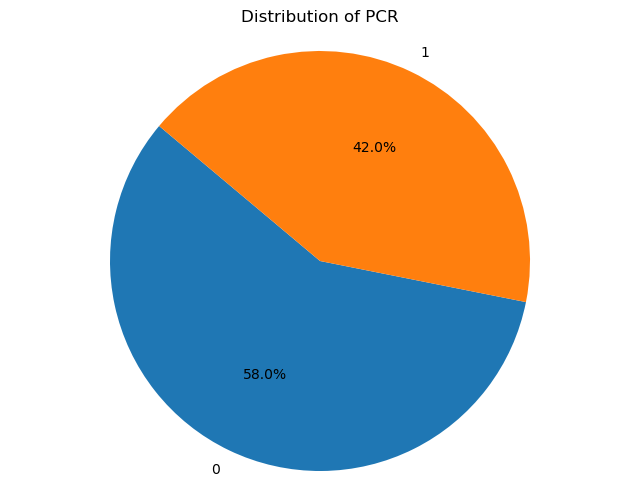

In [44]:
import matplotlib.pyplot as plt

y = df['PCR']

counts = y.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PCR')
plt.axis('equal') 
plt.show()


In [45]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Compute summary statistics
summary_stats = df[numerical_cols].describe()
summary_stats

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,PCR
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,54.843986,31.019597,75.274283,125.603422,74.620533,92.607448,15.990438,97.553649,0.420232
std,18.346096,10.011837,13.357497,18.921280,16.945560,9.725741,3.856882,3.809207,0.493720
min,0.500000,2.280000,0.000000,38.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,42.500000,25.380000,67.000000,113.000000,63.000000,91.000000,15.000000,97.100000,0.000000
50%,56.100000,29.950000,76.000000,124.000000,74.000000,95.000000,16.000000,97.900000,0.000000
75%,67.700000,34.850000,84.000000,137.000000,84.000000,97.000000,18.000000,98.500000,1.000000
max,99.500000,207.480000,127.000000,228.000000,172.000000,100.000000,39.000000,103.400000,1.000000


## Explanatory Data Analysis

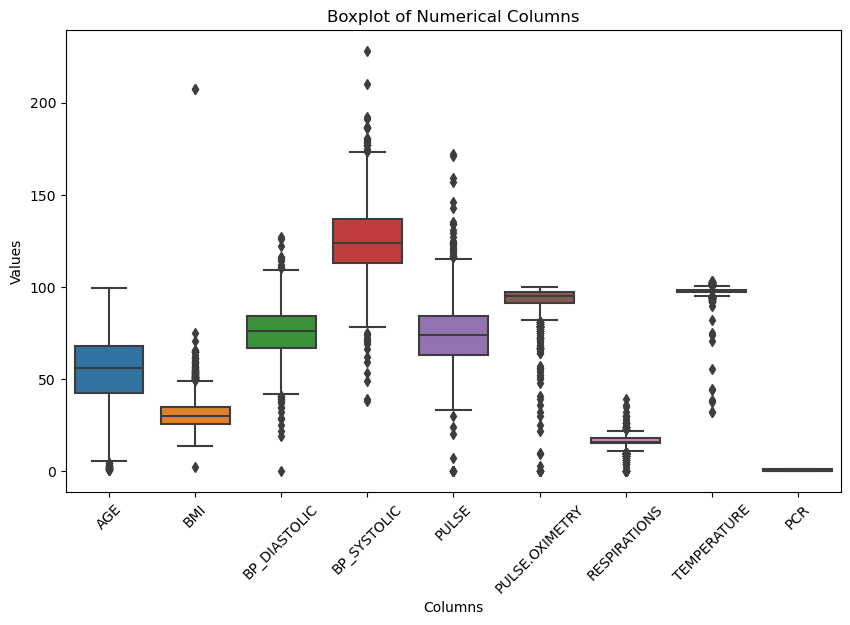

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

C:\Users\semon\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

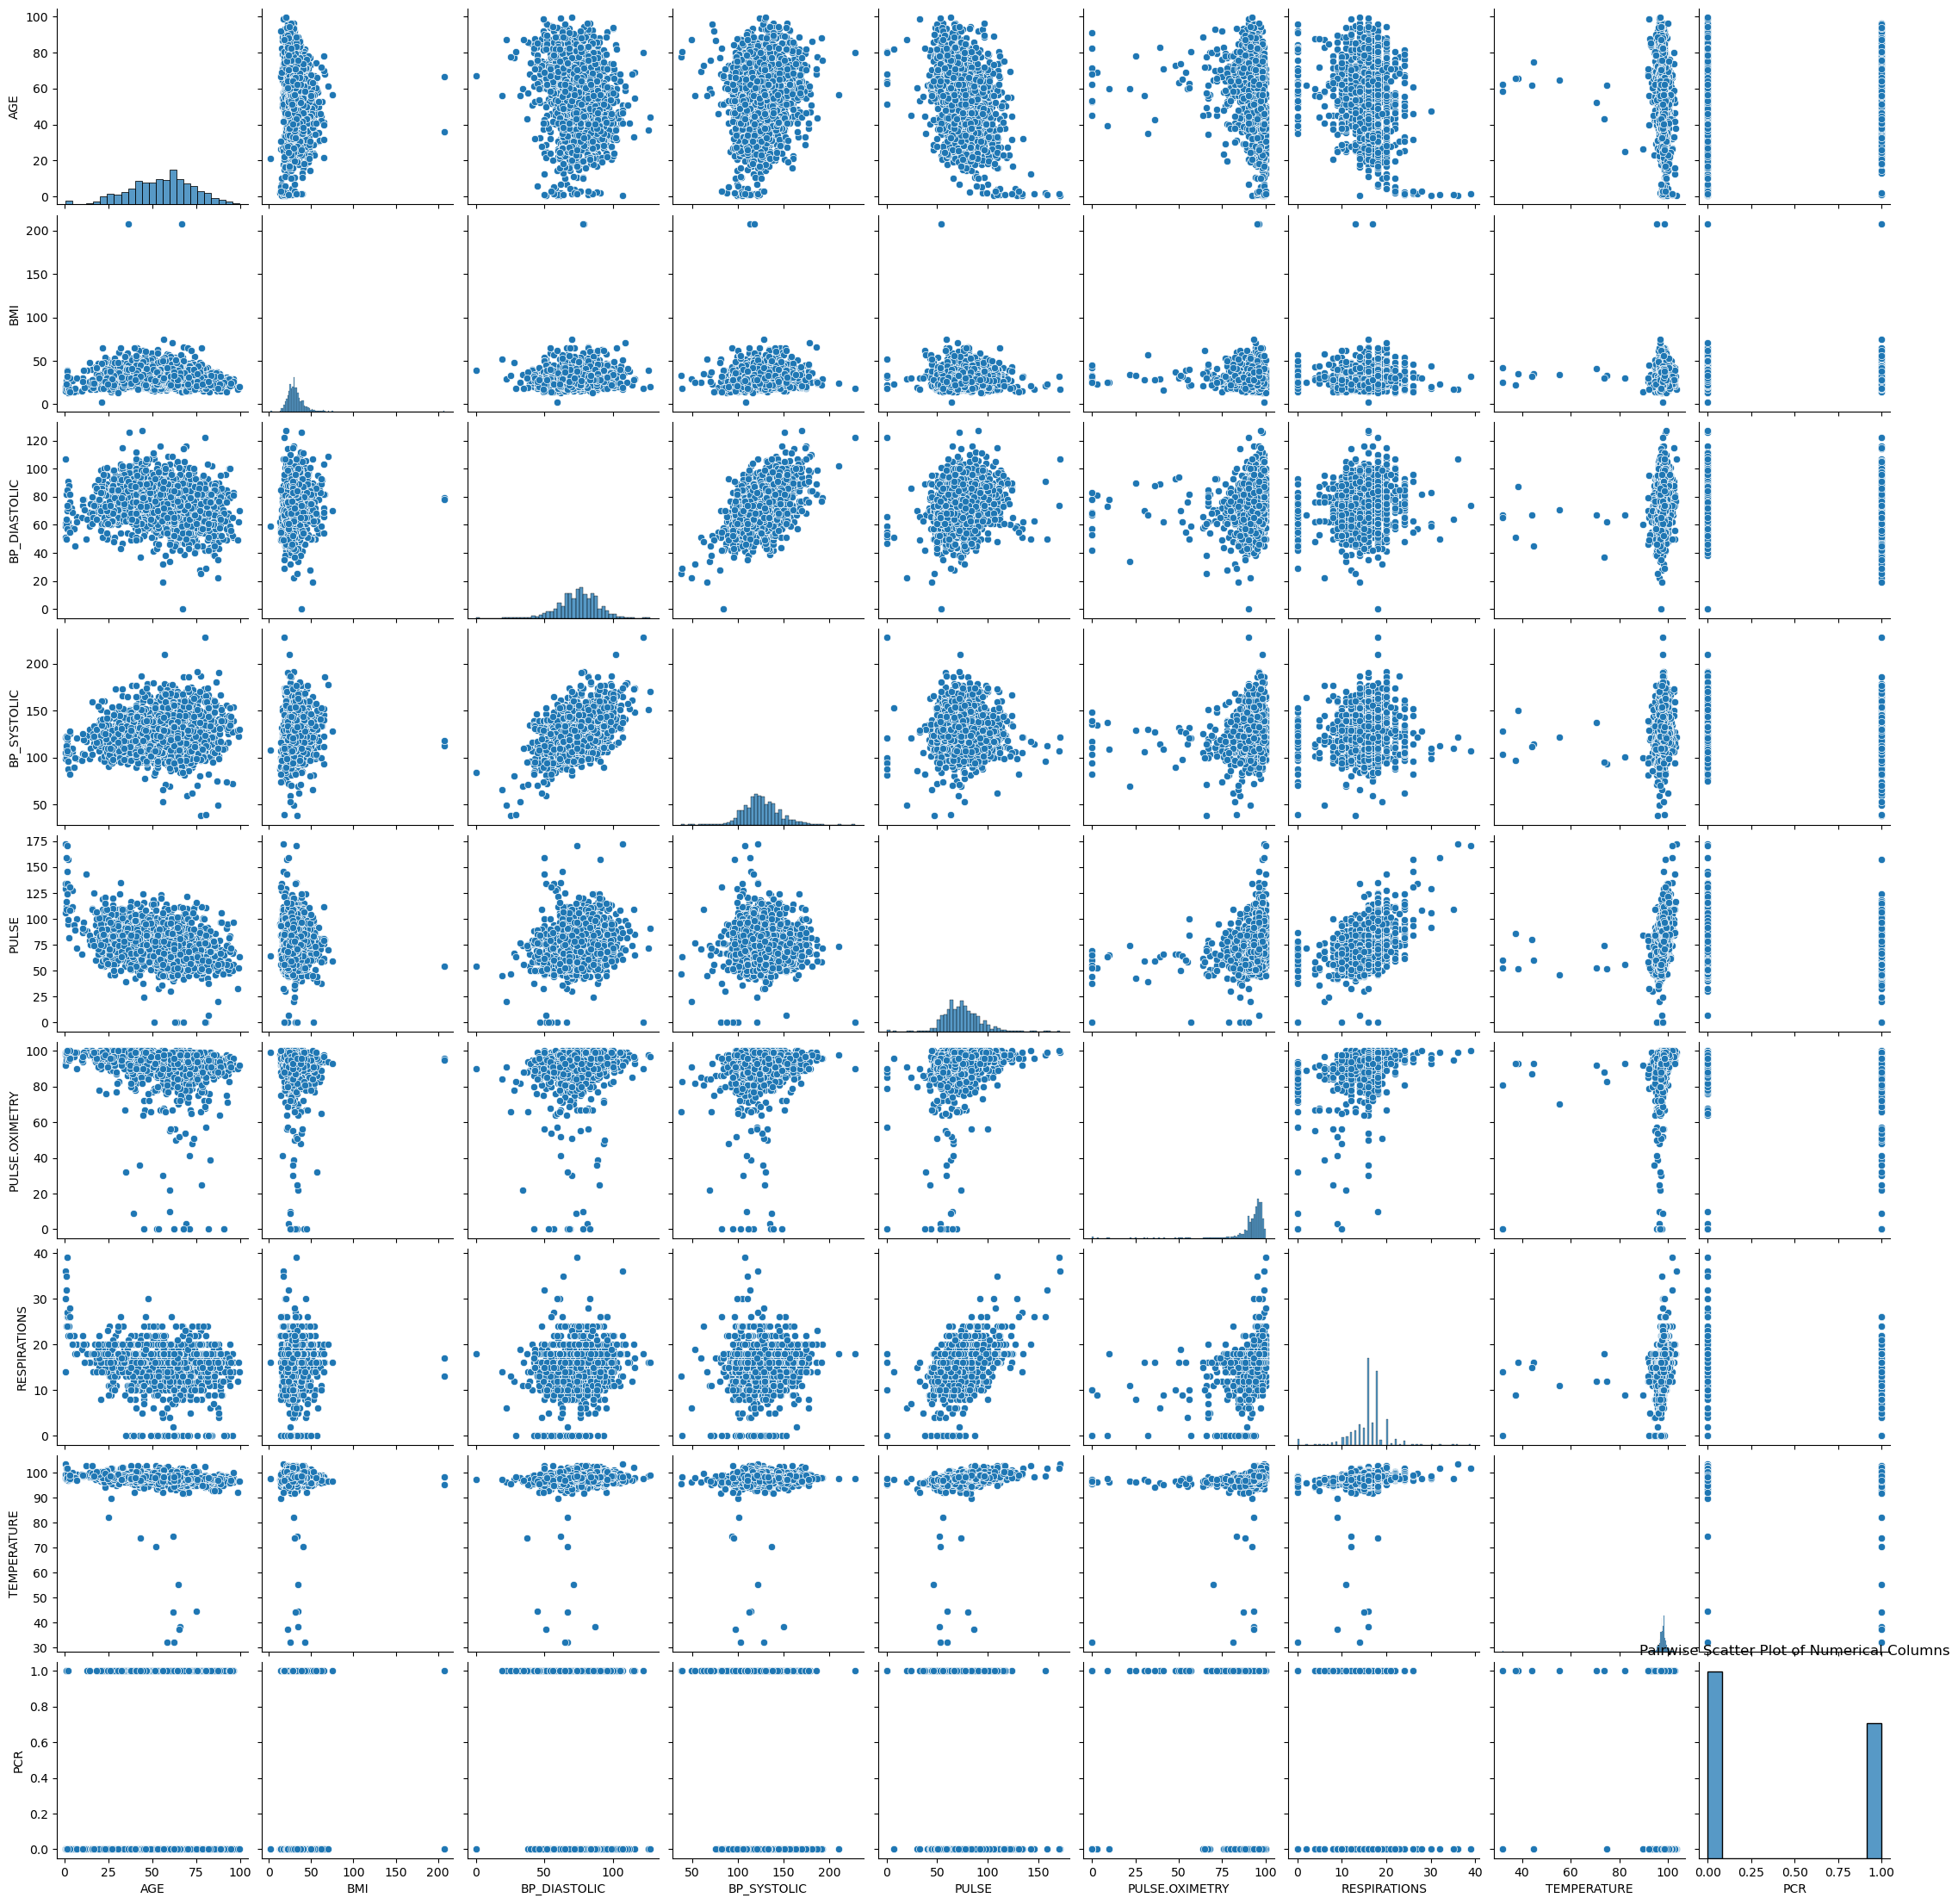

In [47]:
# Scatter plot (pairwise)
plt.figure(figsize=(10, 6))
sns.pairplot(df[numerical_cols])
plt.title('Pairwise Scatter Plot of Numerical Columns')
plt.show()

# Remove Outliers

In [27]:
# Calculate Interquartile Range (IQR)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outlier_indices_iqr = np.where((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))


outlier_indices = [index for sublist in outlier_indices_iqr for index in sublist]

# Remove outliers
df_cleaned = df.drop(outlier_indices, axis=0)
df = df_cleaned

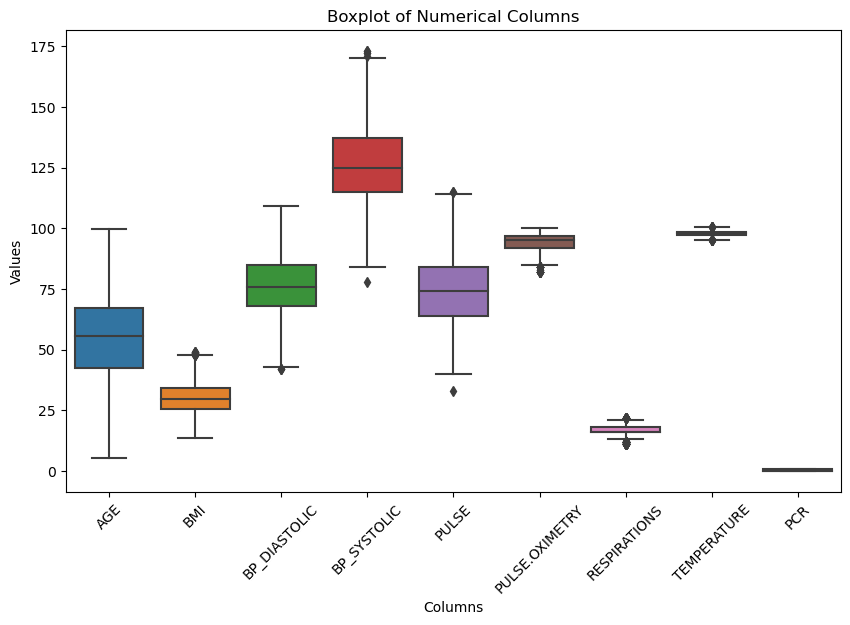

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Pro-process

In [29]:
X = df.drop(columns=['PCR', 'hashed_mrn'])
y = df['PCR']

X

,SEX,ETHNICITY,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,...,B34.9,N17.9,J02.9,R19.7,R07.89,R53.1,R52,E11.9,I50.9,R06.02
8,FEMALE,HISPANIC OR LATINO,61.8,30.67,65,120,58,90,12,98.2,...,False,False,False,False,False,False,False,False,False,False
9,MALE,NOT HISPANIC OR LATINO,54.5,31.44,67,136,85,91,14,98.0,...,False,False,False,False,False,False,False,False,False,False
10,MALE,NOT HISPANIC OR LATINO,61.8,21.90,70,134,70,94,18,97.2,...,False,False,False,False,False,False,False,False,True,False
11,MALE,NOT HISPANIC OR LATINO,72.8,27.21,56,108,61,95,13,96.7,...,False,False,False,False,False,False,False,False,False,True
12,FEMALE,NOT HISPANIC OR LATINO,49.9,30.54,83,132,99,99,18,99.7,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,FEMALE,NOT HISPANIC OR LATINO,62.4,37.38,65,134,75,93,16,97.0,...,False,False,False,False,False,False,False,True,False,True
1982,MALE,NOT HISPANIC OR LATINO,64.2,27.83,83,121,92,93,17,99.1,...,False,False,False,False,False,False,False,False,False,False
1983,FEMALE,HISPANIC OR LATINO,56.4,30.23,72,129,78,98,22,98.3,...,False,False,True,False,False,False,False,False,False,True
1984,FEMALE,HISPANIC OR LATINO,62.3,33.09,84,133,71,96,18,98.5,...,False,False,True,False,False,False,False,False,False,True


In [30]:
# Categorical Encoding
X = pd.get_dummies(X)
X

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,Z20.828,R05,...,R07.89,R53.1,R52,E11.9,I50.9,R06.02,SEX_FEMALE,SEX_MALE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO
8,61.8,30.67,65,120,58,90,12,98.2,False,False,...,False,False,False,False,False,False,True,False,True,False
9,54.5,31.44,67,136,85,91,14,98.0,False,False,...,False,False,False,False,False,False,False,True,False,True
10,61.8,21.90,70,134,70,94,18,97.2,True,False,...,False,False,False,False,True,False,False,True,False,True
11,72.8,27.21,56,108,61,95,13,96.7,False,False,...,False,False,False,False,False,True,False,True,False,True
12,49.9,30.54,83,132,99,99,18,99.7,True,True,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,62.4,37.38,65,134,75,93,16,97.0,False,True,...,False,False,False,True,False,True,True,False,False,True
1982,64.2,27.83,83,121,92,93,17,99.1,True,False,...,False,False,False,False,False,False,False,True,False,True
1983,56.4,30.23,72,129,78,98,22,98.3,True,True,...,False,False,False,False,False,True,True,False,True,False
1984,62.3,33.09,84,133,71,96,18,98.5,True,False,...,False,False,False,False,False,True,True,False,True,False


In [31]:
# Iterate over columns
for column in X.columns:
    if X[column].dtype == bool:
        X[column] = X[column].replace({False: 0, True: 1})
X

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,Z20.828,R05,...,R07.89,R53.1,R52,E11.9,I50.9,R06.02,SEX_FEMALE,SEX_MALE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO
8,61.8,30.67,65,120,58,90,12,98.2,0,0,...,0,0,0,0,0,0,1,0,1,0
9,54.5,31.44,67,136,85,91,14,98.0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,61.8,21.90,70,134,70,94,18,97.2,1,0,...,0,0,0,0,1,0,0,1,0,1
11,72.8,27.21,56,108,61,95,13,96.7,0,0,...,0,0,0,0,0,1,0,1,0,1
12,49.9,30.54,83,132,99,99,18,99.7,1,1,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,62.4,37.38,65,134,75,93,16,97.0,0,1,...,0,0,0,1,0,1,1,0,0,1
1982,64.2,27.83,83,121,92,93,17,99.1,1,0,...,0,0,0,0,0,0,0,1,0,1
1983,56.4,30.23,72,129,78,98,22,98.3,1,1,...,0,0,0,0,0,1,1,0,1,0
1984,62.3,33.09,84,133,71,96,18,98.5,1,0,...,0,0,0,0,0,1,1,0,1,0


In [32]:
y

8       1
9       1
10      0
11      0
12      0
       ..
1981    0
1982    0
1983    0
1984    0
1985    1
Name: PCR, Length: 1559, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[ 0.97584833,  0.2990015 , -0.41287566, ...,  1.00600606,
        -0.63378124,  0.63378124],
       [ 1.64043714,  1.09816186,  1.05118393, ..., -0.9940298 ,
        -0.63378124,  0.63378124],
       [ 0.64928314,  1.55141698,  0.40049078, ...,  1.00600606,
        -0.63378124,  0.63378124],
       ...,
       [ 0.86126405,  1.19358399,  0.88851064, ..., -0.9940298 ,
        -0.63378124,  0.63378124],
       [ 0.56907414,  1.28900612, -0.41287566, ...,  1.00600606,
        -0.63378124,  0.63378124],
       [-1.57365186,  0.5032645 ,  0.96984729, ..., -0.9940298 ,
        -0.63378124,  0.63378124]])

## Models

### Logistic Regression

In [35]:

##########   Logistic Regression  


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


lr_model = LogisticRegression(random_state=42)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 2, 3, 5, 10],  
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'random_state': [42, 24, 8975]
}


grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_


y_pred_lr_best = best_lr_model.predict(X_test_scaled)


print("Best Logistic Regression Parameters:", best_params)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr_best))


Best Logistic Regression Parameters: {'C': 5, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.7384615384615385
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       242
           1       0.69      0.57      0.62       148

    accuracy                           0.74       390
   macro avg       0.72      0.71      0.71       390
weighted avg       0.73      0.74      0.73       390



### SVM

In [36]:
############ SVM 


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameter grid

params_grid = {
    'C': [1, 2, 4, 5, 6],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}



svm_model = SVC(random_state=42)


grid_search = GridSearchCV(estimator=svm_model, param_grid=params_grid, cv=5)


grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred_svm = best_estimator.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", best_params)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Best Parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.7538461538461538
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.81       242
           1       0.72      0.57      0.64       148

    accuracy                           0.75       390
   macro avg       0.75      0.72      0.73       390
weighted avg       0.75      0.75      0.75       390



### Random Forest

In [37]:
#### Random Forest


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [2, 5, 10, 20],  
    'max_depth': [2, 4, 6, 10],      
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred_rf_best = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Best Random Forest Parameters:", best_params)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))


Best Random Forest Parameters: {'max_depth': 4, 'n_estimators': 20}
Random Forest Accuracy: 0.7153846153846154
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       242
           1       0.69      0.45      0.54       148

    accuracy                           0.72       390
   macro avg       0.71      0.66      0.67       390
weighted avg       0.71      0.72      0.70       390



# Outlier + Pre-Process + Data Imbalancing 